In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Import all the libraries we'll need

# for numeric calculations
import numpy as np
# for data handling
import pandas as pd
# for plotting charts
import matplotlib.pyplot as plt
# for making plots
import seaborn as sns


In [8]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/Dataset .csv")


In [9]:
# Take a quick look at the first 25 rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [10]:
# Check how many rows and columns into the dataset (rows x columns)
df.shape

(9551, 21)

In [11]:
# Check if there are any missing (empty) values in each column
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [12]:
# Remove rows where the 'Cuisines' column is empty
# Because we cannot analyze cuisine if it is missing

df = df.dropna(subset=['Cuisines'])

# Reset the index after dropping rows to keep it clean
df.reset_index(drop=True, inplace=True)


In [13]:
# Check nulls again (for safety)
print(df['Cuisines'].isnull().sum())



0


In [14]:
# Find the top 10 most common cuisine combinations
top_cuisine_combos = df['Cuisines'].value_counts().head(10)
print(top_cuisine_combos)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


/tmp/ipython-input-15-786759721.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisine_combos.values, y=top_cuisine_combos.index, palette='plasma')


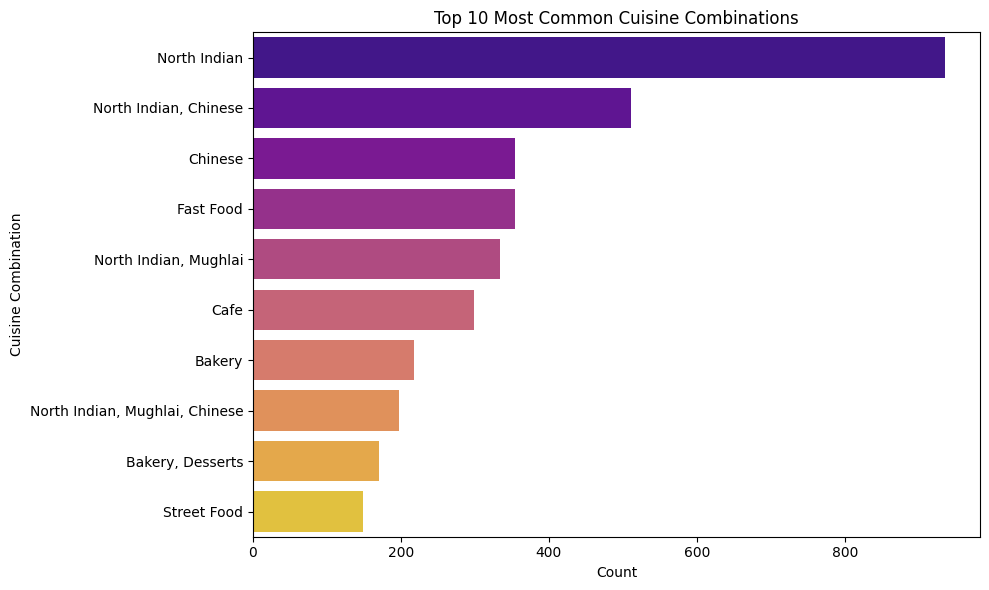

In [15]:
# Most Common Cuisine Combinations

plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisine_combos.values, y=top_cuisine_combos.index, palette='plasma')
plt.title("Top 10 Most Common Cuisine Combinations")
plt.xlabel("Count")
plt.ylabel("Cuisine Combination")
plt.tight_layout()
plt.show()

In [16]:
# Check which cuisine combinations have highest average ratings
# We'll group data by cuisines and find average of ratings
cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print("Top 10 cuisine combinations by average rating:")
print(cuisine_rating)

# Also get how many times each cuisine appears in the dataset
cuisine_counts = df['Cuisines'].value_counts()

# Combine both rating and count data into one table
rating_df = pd.DataFrame({
    'Average Rating': cuisine_rating,
    'Count': cuisine_counts
}).dropna()

# Sort again by highest rating
rating_df = rating_df.sort_values(by='Average Rating', ascending=False).head(10)
print("Top cuisines with rating and appearance count:")
print(rating_df)



Top 10 cuisine combinations by average rating:
Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Italian, Bakery, Continental       4.9
BBQ, Breakfast, Southern           4.9
European, German                   4.9
Hawaiian, Seafood                  4.9
Sunda, Indonesian                  4.9
Name: Aggregate rating, dtype: float64
Top cuisines with rating and appearance count:
                                 Average Rating  Count
Cuisines                                              
American, Burger, Grill                     4.9      1
American, Caribbean, Seafood                4.9      1
American, Coffee and Tea                    4.9      1
BBQ, Breakfast, Southern                    4.9      1
Burger, Bar Food, Steak                     4.9      1
European, German                            4.9      1
Hawaiian, Seafood           

/tmp/ipython-input-17-153010316.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_df['Average Rating'], y=rating_df.index, palette='magma')


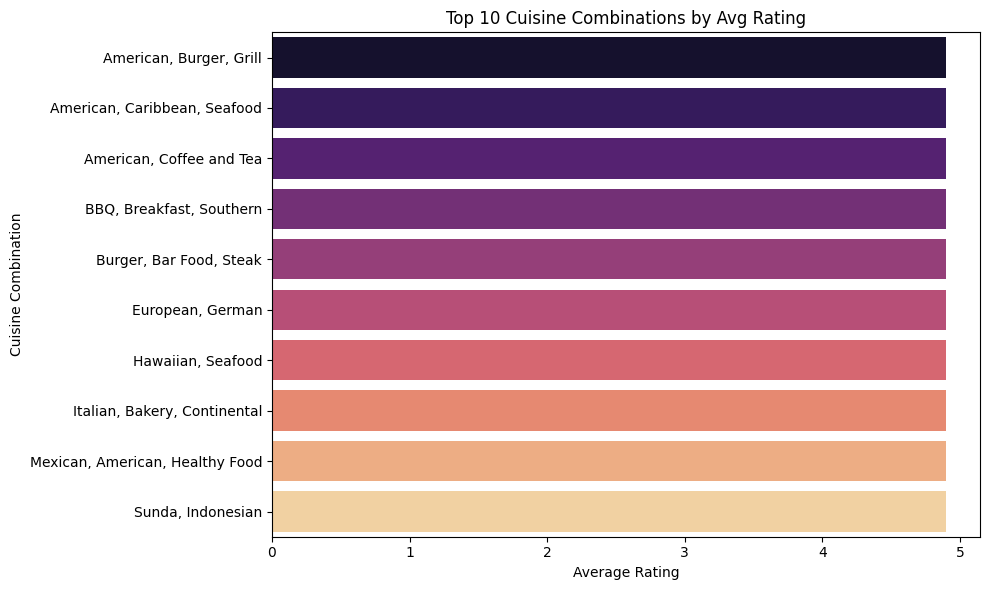

In [17]:
 # Make bar chart to show top 10 cuisines by average rating

plt.figure(figsize=(10,6))
sns.barplot(x=rating_df['Average Rating'], y=rating_df.index, palette='magma')
plt.title("Top 10 Cuisine Combinations by Avg Rating")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine Combination")
plt.tight_layout()
plt.show()


###  Insights:

- Most common cuisine combinations are:
  - North Indian
  - North Indian + Chinese
  - Chinese
  - Fast Food
- These popular combinations are preferred by restaurants, as shown by high frequency counts.

- However, the **highest average ratings (4.9)** were found in rare combinations like:
  - American, Coffee and Tea
  - Italian, Deli
  - BBQ, Breakfast, Southern

- These combinations appear only once or twice in the dataset, so ratings may be biased due to low sample size.

###  Conclusion:

While common combinations like North Indian and Chinese dominate the market, niche cuisine mixes tend to receive higher ratings though more data is needed to confirm their consistency.
